<h6 style='text-align:center;font-size:40px;background-color:CRIMSON;border:20px;color:white'>LOAN PREDICTION<h6>

<h2 style='text-align:center;font-size:30px;background-color:CRIMSON;border:20px;color:white'>CONTENTS<h2>

1. Import Relevant Libraries
2. Data Inspection
3. Data Cleaning
4. Exploratory Data Analysis

<h2 style='text-align:center;font-size:30px;background-color:CRIMSON;border:50px;color:white'>ABOUT THE COMPANY<h2>

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.

Loan prediction is a very common real life problem that each retail bank faces atleast one in it lifetime. if done corretly, it can save a lot of man hours at the end of retail bank.


<h2 style='text-align:center;font-size:30px;background-color:CRIMSON;border:50px;color:white'>PROBLEM STATEMENT<h2>

The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling the online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and others. To automate this process, they have given a problem to identify the customer segments, those are **Eligible for loan amount so that they can specifically target these customers**

<h2 style='text-align:center;font-size:30px;background-color:CRIMSON;border:20px;color:white'>DATA<h2>

# **<span style="color:#F7B2B0;">Goal</span>**
 
The goal is to Predict weather loan would be approved or Not

# **<span style="color:#F7B2B0;">Data</span>**

Each row contians the attribe of person and the last attribute loan status contanins wheather loan should be approved or not.
**Files**
> - ``` Loan_Data.csv``` - Dataset given

**Columns**

|Variable  | Description |
| --- | --- |
| Loan_ID | Unique Loan ID |
| Gender| Male/ Female |
|Married|Applicant married (Y/N)|
|Dependents|Number of dependents|
|Education|Applicant Education (Graduate/ Under Graduate)|
|Self_Employed|Self employed (Y/N)|
|ApplicantIncome|Applicant income|
|CoapplicantIncome|Coapplicant income|
|LoanAmount|Loan amount in thousands|
|Loan_Amount_Term|Term of loan in months|
|Credit_History|credit history meets guidelines|
|Property_Area|Urban/ Semi Urban/ Rural|
|Loan_Status|(Target) Loan approved (Y/N)|


<h2 style='text-align:center;font-size:30px;background-color:CRIMSON;border:20px;color:white'>Step 1: Importing the Relevant Libraries <h2>

In [1]:
import  numpy as np
import  pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import feature_selection
from sklearn import model_selection
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

# Importing data 

In [3]:
train = pd.read_csv(r'C:\Users\Pelux\Desktop\Jupyter Notebook\LOAN PREDICTION\train_u6lujuX_CVtuZ9i.csv')
test = pd.read_csv(r'C:\Users\Pelux\Desktop\Jupyter Notebook\LOAN PREDICTION\test_Y3wMUE5_7gLdaTN.csv')

In [4]:
print (train.shape, test.shape)

(614, 13) (367, 12)


In [5]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


<h2 style='text-align:center;font-size:30px;background-color:CRIMSON;border:20px;color:white'>Step 2. Data Inspection<h2>

In [6]:
train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
train.apply(lambda x: sum(x.isnull()))

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
test.apply(lambda x: sum(x.isnull()))

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

## Check unique values in dataset

In [10]:
train.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

## Check for categorical attributes

In [11]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

WE can see three format of data types:
> - ``` object``` - Object format means variables are categorical.
> - ``` int64``` - It represent the integer variables.
> - ``` float64``` -It represent the variable which have some decimal values involved. 


### Counting frequency of categories for each categorical features

In [12]:
data = [train,test]
for dataset in data:
    #Filter categorical variables
    categorical_columns = [x for x in dataset.dtypes.index if dataset.dtypes[x]=='object']
    # Exclude ID cols and source:
    categorical_columns = [x for x in categorical_columns if x not in ['Loan_ID' ]]
    #Print frequency of categories
    
for col in categorical_columns:
    print ('\nFrequency of Categories for variable %s'%col)
    print (train[col].value_counts())


Frequency of Categories for variable Gender
Male      489
Female    112
Name: Gender, dtype: int64

Frequency of Categories for variable Married
Yes    398
No     213
Name: Married, dtype: int64

Frequency of Categories for variable Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Frequency of Categories for variable Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

Frequency of Categories for variable Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64

Frequency of Categories for variable Property_Area
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


<h2 style='text-align:center;font-size:30px;background-color:CRIMSON;border:20px;color:white'>Step 3. Exploratory Data Analysis and Data Cleaning <h2>

# Visually analysing object data type

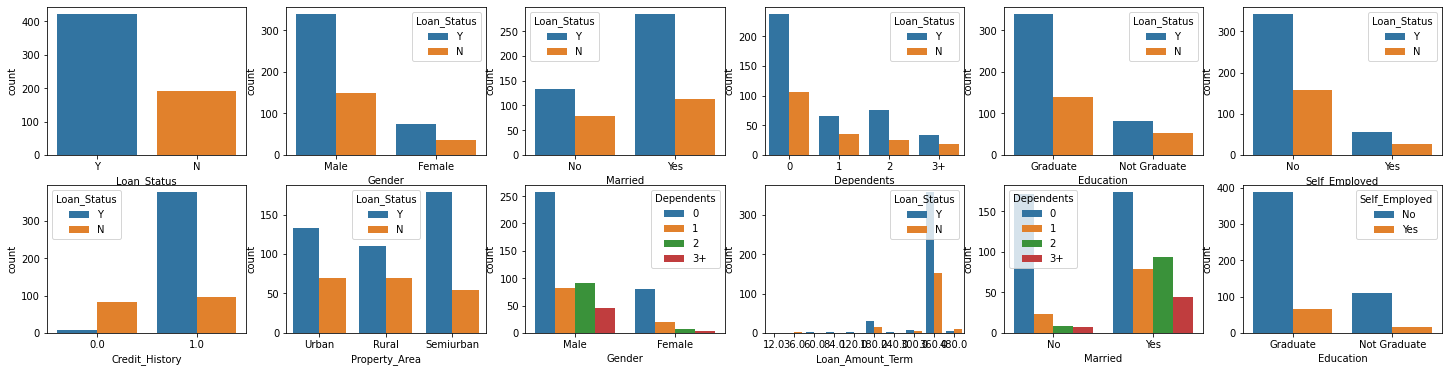

In [13]:
fig, axs = plt.subplots(figsize=(25,6),ncols=6,nrows=2)
sns.countplot(x=train['Loan_Status'],ax=axs[0,0])
sns.countplot(x=train['Gender'],hue=train['Loan_Status'],ax=axs[0,1])
sns.countplot(x=train['Married'],hue=train['Loan_Status'],ax=axs[0,2])
sns.countplot(x=train['Dependents'],hue=train['Loan_Status'],ax=axs[0,3])
sns.countplot(x=train['Education'],hue=train['Loan_Status'],ax=axs[0,4])
sns.countplot(x=train['Self_Employed'],hue=train['Loan_Status'],ax=axs[0,5])
sns.countplot(x=train['Credit_History'],hue=train['Loan_Status'],ax=axs[1,0])
sns.countplot(x=train['Property_Area'],hue=train['Loan_Status'],ax=axs[1,1])
sns.countplot(x=train['Gender'],hue=train['Dependents'],ax=axs[1,2])
sns.countplot(x=train['Loan_Amount_Term'],hue=train['Loan_Status'],ax=axs[1,3])
sns.countplot(x=train['Married'],hue=train['Dependents'],ax=axs[1,4])
sns.countplot(x=train['Education'],hue=train['Self_Employed'],ax=axs[1,5])
plt.show()

1.  Loan_Status is our target variable which seems to be imbalanced as its in 1:3 ratio which needs to be worked on for our model to make accurate predictions
2. Males are more likely to be eligible for loans compared to female
3. Married are more likely to be eligible for loans compared to non married
4. People with less dependents are eligible for loans 
5. Graduates are eligible for loan compared to non graduate
6. Non Selfemployed are eligible for loan compared to selfemployed
7. Poeple with good credit score are more likely to be eligible for loan compared to low credit scored
8. Semiurban and Urban people have are eligible for loan compared to rural population
9. Male have more dependents compared to female
10. Mostly people opt for 360 months term loan
11. Married people have more dependents compared to female
12. Graduates are selfemployed compared to non graduates

# Visually analysing numeric data type

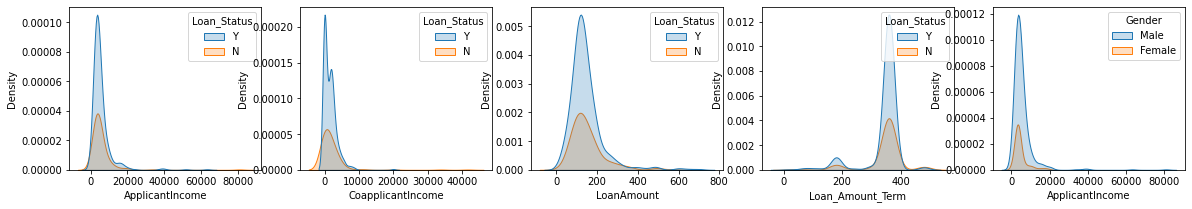

In [14]:
fig,axs=plt.subplots(figsize=(20,3),ncols=5)
sns.kdeplot(x=train['ApplicantIncome'],hue=train['Loan_Status'],fill=True,ax=axs[0])
sns.kdeplot(x=train['CoapplicantIncome'],hue=train['Loan_Status'],fill=True,ax=axs[1])
sns.kdeplot(x=train['LoanAmount'],hue=train['Loan_Status'],fill=True,ax=axs[2])
sns.kdeplot(x=train['Loan_Amount_Term'],hue=train['Loan_Status'],fill=True,ax=axs[3])
sns.kdeplot(x=train['ApplicantIncome'],hue=train['Gender'],fill=True,ax=axs[4])
plt.show()

1. There is high positive skewness in Applicant income and coapplicant income
2. There is negative skewness in loan_Amount_term
3. Income range between 0:20k are eligible for loan

#### Plotting No. of Males vs No. of Females

<AxesSubplot: xlabel='Gender', ylabel='count'>

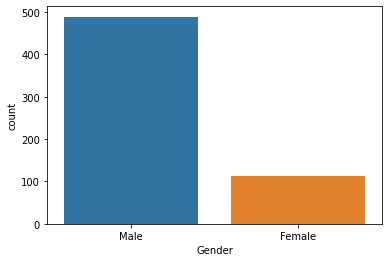

In [15]:
sns.countplot(train['Gender'])

<AxesSubplot: xlabel='Credit_History', ylabel='count'>

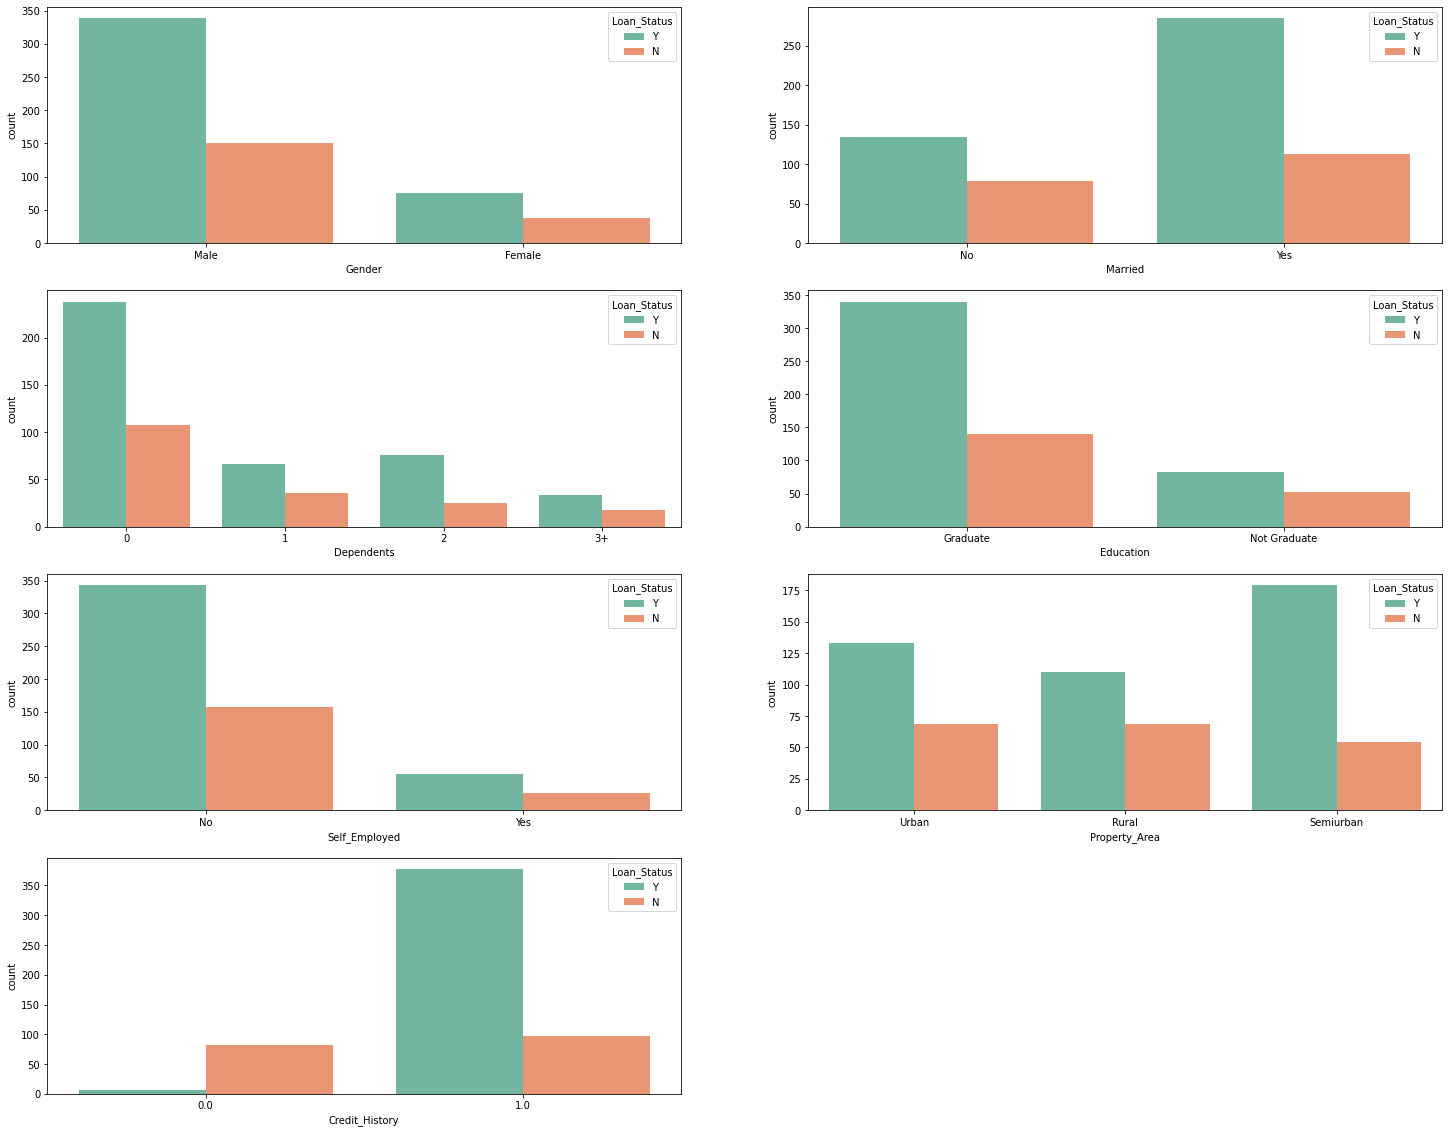

In [16]:
plt.figure(figsize = (25,20))

plt.subplot(4,2,1)
sns.countplot(x = 'Gender', hue = 'Loan_Status', palette = 'Set2', data = train)

plt.subplot(4,2,2)
sns.countplot(x = 'Married', hue = 'Loan_Status',palette = 'Set2', data = train)

plt.subplot(4,2,3)
sns.countplot(x = 'Dependents', hue = 'Loan_Status', palette = 'Set2', data = train)

plt.subplot(4,2,4)
sns.countplot(x = 'Education', hue = 'Loan_Status', palette = 'Set2', data = train)

plt.subplot(4,2,5)
sns.countplot(x = 'Self_Employed', hue = 'Loan_Status', palette = 'Set2', data = train)

plt.subplot(4,2,6)
sns.countplot(x = 'Property_Area', hue = 'Loan_Status', palette = 'Set2', data = train)

plt.subplot(4,2,7)
sns.countplot(x = 'Credit_History', hue = 'Loan_Status', palette = 'Set2', data = train)

### Above graph tells:
    - The male applicants take more amount of loan than female.
    - The males are higher in number of "NOT self employed" category.
    - The amount is still larger in the income range in (0 to 20000).
    - Also we observe that majority of applicants are NOT self employed.
    - Highest Loan amount taken is by the female applicant of about 700 which is NOT self employed.
    - The majority of income taken is about 0-200 with income in the range 0-20000. 
    - The line plotted shows that with increase in income the amount of loan increases with almost same slope for the case of women in both the cases but a slightely lesser slope in the case of men in Self- Employed category as compared to non-self employed.

#### Approval of loans between Males & Females

In [17]:
pd.crosstab(train.Gender , train.Loan_Status, margins = True)

Loan_Status,N,Y,All
Gender,,,
Female,37,75,112
Male,150,339,489
All,187,414,601


### Filling up NAN values 

#### Here we will fill the null values of the variables Gender, Married, Dependents and Self_Employed with the mode

In [18]:
train['Gender']=train['Gender'].fillna(train['Gender'].mode()[0])
train['Married']=train['Married'].fillna(train['Married'].mode()[0])
train['Dependents']=train['Dependents'].fillna(train['Dependents'].mode()[0])
train['Self_Employed']=train['Self_Employed'].fillna(train['Self_Employed'].mode()[0])
train['Loan_Amount_Term']=train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0])
train['Credit_History']=train['Credit_History'].fillna(train['Credit_History'].mode()[0])

#### Here we will fill the null values of the variables LoanAmount and Loan_Amount_Term with the Mean

In [19]:
train['LoanAmount']=train['LoanAmount'].fillna(train['LoanAmount'].mean())

### For Test Dataset

In [20]:
test['Gender']=test['Gender'].fillna(test['Gender'].mode()[0])
test['Married']=test['Married'].fillna(test['Married'].mode()[0])
test['Dependents']=test['Dependents'].fillna(test['Dependents'].mode()[0])
test['Self_Employed']=test['Self_Employed'].fillna(test['Self_Employed'].mode()[0])
test['Loan_Amount_Term']=test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0])
test['Credit_History']=test['Credit_History'].fillna(test['Credit_History'].mode()[0])

In [21]:
test['LoanAmount']=test['LoanAmount'].fillna(test['LoanAmount'].mean())

### Dropping the ID column

In [22]:
train.drop(['Loan_ID'], axis = 1 , inplace =True)
test.drop(['Loan_ID'], axis = 1 , inplace =True)

In [23]:
train.apply(lambda x: sum(x.isnull()))

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [24]:
train.apply(lambda x: sum(x.isnull()))

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Plotting No. of Dependants (Size of family) in each household

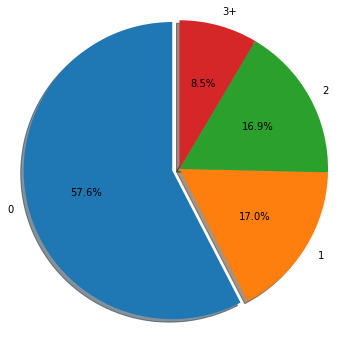

In [25]:
plt.figure(figsize=(6,6))
labels = ['0' , '1', '2' , '3+']
explode = (0.05, 0, 0, 0)
size = [345 , 102 , 101 , 51]

plt.pie(size, explode=explode, labels=labels,
        autopct='%1.1f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.show()

In [26]:
train.Dependents.value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

### Approval of loans between different sizes of families

In [27]:
pd.crosstab(train.Dependents , train.Loan_Status, margins = True)

Loan_Status,N,Y,All
Dependents,,,
0,113,247,360
1,36,66,102
2,25,76,101
3+,18,33,51
All,192,422,614


> The applicants with highest number of dependants are least in number whereas applicants with no dependance are greatest among these.

### Plotting No. of people with vs without Credit History

<AxesSubplot: xlabel='Credit_History', ylabel='count'>

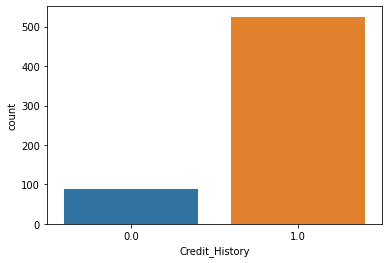

In [28]:
sns.countplot(train['Credit_History'])

### Approval of loans people those who have Credit History and those who don't

In [29]:
pd.crosstab(train.Credit_History , train.Loan_Status, margins = True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,110,415,525
All,192,422,614


### Plotting No. of people who are Self-employed vs who aren't

<AxesSubplot: xlabel='Self_Employed', ylabel='count'>

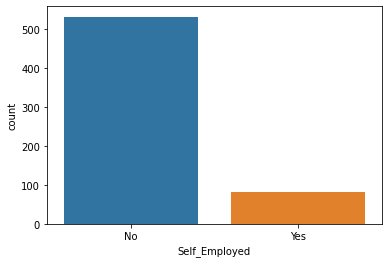

In [30]:
sns.countplot(train['Self_Employed'])

### Approval of loans between people who are Self-employed & who aren't

In [31]:
pd.crosstab(train.Self_Employed , train.Loan_Status,margins = True)

Loan_Status,N,Y,All
Self_Employed,,,
No,166,366,532
Yes,26,56,82
All,192,422,614


### Plotting No. of Married people vs Unmarried people

<AxesSubplot: xlabel='Married', ylabel='count'>

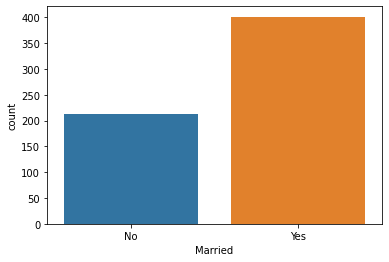

In [32]:
sns.countplot(train.Married)

### Approval of loans between Married and Unmarried people

In [33]:
pd.crosstab(train.Married , train.Loan_Status,margins = True)

Loan_Status,N,Y,All
Married,,,
No,79,134,213
Yes,113,288,401
All,192,422,614


<AxesSubplot: xlabel='LoanAmount', ylabel='Density'>

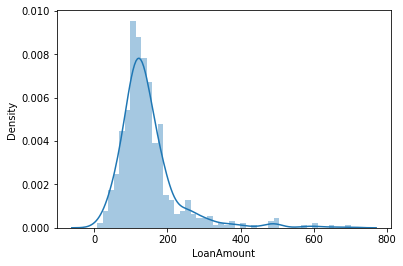

In [34]:
sns.distplot(train['LoanAmount'])

> We observe no outliers in the continuous variable Loan Amount

### Plotting Graduates vs Non-Graduates

<AxesSubplot: xlabel='Education', ylabel='count'>

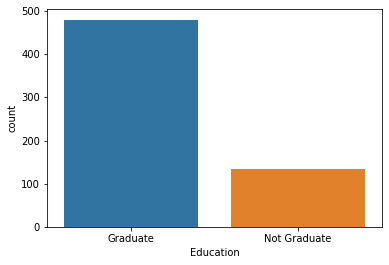

In [35]:
sns.countplot(train.Education)

# Visualizing the Correlations and Relations

<AxesSubplot: >

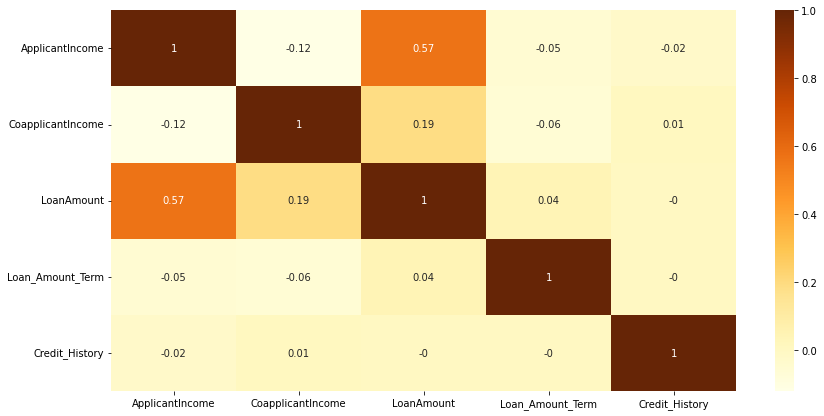

In [36]:
correlation = train.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

1. Credit history is highly correlated to our target
2. Education, self_employed, coapplicant income, loan amount, applicant income has negative correlation
3. Loan amount and applicant are highly correlated
4. Gender-Married & Dependents-Married are correlated
5. This reflects that there are multicoreniality

### Relation between Credit History and Loan status.

In [37]:
train.Credit_History.value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

<AxesSubplot: xlabel='Credit_History'>

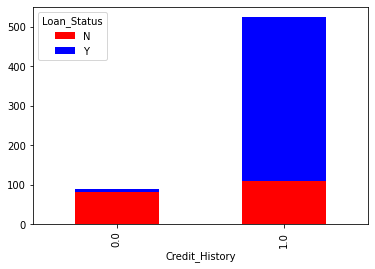

In [38]:
lc = pd.crosstab(train['Credit_History'], train['Loan_Status'])
lc.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

- The credit history vs Loan Status indicates:
    - The good credit history applicants have more chances of getting Loan.
    - With better credit History the Loan amount given was greater too.
    - But many were not given loan in the range 0-100
    - The applicant with poor credit history were handled in the range 0-100 only.

In [39]:
import dtale

In [40]:
dtale.show(train)

In [41]:
import sys

!"{sys.executable}" -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [42]:
from pandas_profiling import ProfileReport

2023-03-04 14:55:32,184 - INFO     - Pandas backend loaded 1.3.4
2023-03-04 14:55:32,340 - INFO     - Numpy backend loaded 1.20.3
2023-03-04 14:55:32,343 - INFO     - Pyspark backend NOT loaded
2023-03-04 14:55:32,354 - INFO     - Python backend loaded


In [43]:
profile = ProfileReport(train, title="Pandas Profiling Report")

In [44]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<h2 style='text-align:center;font-size:30px;background-color:CRIMSON;border:20px;color:white'>Step 4. Feature Engineering<h2>

In [45]:
train.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [46]:
train['ApplicantIncome'] = train['ApplicantIncome'].apply(np.int64)
train['CoapplicantIncome'] = train['CoapplicantIncome'].apply(np.int64)
train['LoanAmount'] = train['LoanAmount'].apply(np.int64)
train['Credit_History'] = train['Credit_History'].apply(np.int64)

In [47]:
train.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount             int64
Loan_Amount_Term     float64
Credit_History         int64
Property_Area         object
Loan_Status           object
dtype: object

## Preprocessing Task before Model Building

In [48]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [49]:
train['Gender']= le.fit_transform(train['Gender'])
train['Married']= le.fit_transform(train['Married'])
train['Dependents']= le.fit_transform(train['Dependents'])
train['Education']= le.fit_transform(train['Education'])
train['Self_Employed']= le.fit_transform(train['Self_Employed'])
train['Property_Area']= le.fit_transform(train['Property_Area'])
train['Loan_Status']= le.fit_transform(train['Loan_Status'])

## Splitting our data into train and test

In [50]:
X=train.drop('Loan_Status',axis=1)

In [51]:
Y=train['Loan_Status']

## Model Training

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=101, test_size=0.2)

## Standarization

In [59]:
from sklearn.preprocessing import StandardScaler
# Crating a standard scaler object
scaler=StandardScaler()
# using fit_transform to Standardize the train data
X_train=scaler.fit_transform(X_train)
# here using transform only to avoid data leakage
X_test=scaler.transform(X_test)

<h2 style='text-align:center;font-size:30px;background-color:CRIMSON;border:20px;color:white'>Step 5. Building Model<h2>

## Logistic Regression

In [76]:
# logistic regression
from sklearn.linear_model import LogisticRegression
model3 = LogisticRegression()
model3.fit(X_train, Y_train)
acc_l = model3.score(X_test, Y_test)*100
print("Accuracy is", model3.score(X_test, Y_test)*100)


Accuracy is 79.67479674796748


## Random Forest

In [62]:
# randomforest classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, Y_train)
print("Accuracy is", model.score(X_test, Y_test)*100)

Accuracy is 77.23577235772358


In [67]:
# random forest classifier
from sklearn.metrics import confusion_matrix
Y_pred = model.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[22, 23],
       [ 5, 73]], dtype=int64)

### Decision tree classifier

In [64]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()
model2.fit(X_train, Y_train)
print("Accuracy is", model2.score(X_test, Y_test)*100)

Accuracy is 70.73170731707317


### K-Nearest Neighbors

In [69]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(Y_test , pred_knn)*100
acc_knn

76.42276422764228

### Naive Bayes

In [70]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
pred_gb = gaussian.predict(X_test)
acc_gb = accuracy_score(Y_test , pred_gb)*100
acc_gb

78.04878048780488

### SVM

In [71]:
svc = SVC()
svc.fit(X_train, Y_train)
pred_svm = svc.predict(X_test)
acc_svm = accuracy_score(Y_test , pred_svm)*100
acc_svm

79.67479674796748

### Gradient Boosting Classifier

In [72]:
gbk = GradientBoostingClassifier()
gbk.fit(X_train, Y_train)
pred_gbc = gbk.predict(X_test)
acc_gbc = accuracy_score(Y_test , pred_gbc)*100
acc_gbc

77.23577235772358

In [77]:
## Arranging the Accuracy results
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forrest','K- Nearest Neighbour' ,
             'Naive Bayes' , 'SVM','Gradient Boosting Classifier'],
    'Score': [acc_l , acc_rf , acc_knn , acc_gb ,acc_svm ,acc_gbc ]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Logistic Regression,79.674797
4,SVM,79.674797
3,Naive Bayes,78.048780
5,Gradient Boosting Classifier,77.235772
1,Random Forrest,76.422764
2,K- Nearest Neighbour,76.422764


## The highest classification accuracy is shown by Logistic Regression => 80%

# Conclusion

The Loan status has better relation with features such as Credit History, Applicant's Income, Loan Amount needed by them, Family status(Depenedents) and Property Area which are generally considered by the loan providing organisations. These factors are hence used to take correct decisions to provide loan status or not. This data analysis hence gives a realisation of features and the relation between them from the older decision examples hence giving a learning to predict the class of the unseen data. 

# Model save

In [80]:
import pickle
file=open("model.pkl", 'wb')
pickle.dump(model, file)